# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters on the perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from scipy.spatial.distance import cdist 
from scipy.stats import pearsonr

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [2]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
## write code here for the Distance function here # 
    m , n = Data_points.shape
    k = Cluster_Centroids.shape[0]
    distances = np.zeros(shape=(k,m))
    for i in range(k):
        centroid = Cluster_Centroids[i]
        if Distance_Type == 'euclidean':
            distances[i] = np.linalg.norm(Data_points - centroid,axis=1)
#             distances = cdist(Data_points,Cluster_Centroids,'euclidean')
        else:
#           distances[i] = np.abs(Data_points-centroid,axis=1)
            distances = cdist(Data_points,Cluster_Centroids,"correlation")
    Cluster_Distance = distances.T
    return Cluster_Distance 


In [3]:
points = np.array([[1,2],[4,5],[7,8],[10,11],[13,14],[16,17]])
centroids = np.array([[1,1],[2,2],[3,3],[4,4]])
print(GUC_Distance(centroids,points,"euclidean").shape)
GUC_Distance(centroids,points,"euclidean")

(6, 4)


array([[ 1.        ,  1.        ,  2.23606798,  3.60555128],
       [ 5.        ,  3.60555128,  2.23606798,  1.        ],
       [ 9.21954446,  7.81024968,  6.40312424,  5.        ],
       [13.45362405, 12.04159458, 10.63014581,  9.21954446],
       [17.69180601, 16.2788206 , 14.86606875, 13.45362405],
       [21.9317122 , 20.51828453, 19.10497317, 17.69180601]])

> ### 1.2. Code for K means function 

Create the intial cluster heads 
 1. For each data column find the data ranges 
 2. randomly generate a number of cluster heads equal to K (th number of clusters)   

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [4]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
    # write code for intial cluster heads here 
    k = Number_of_Clusters
    m , n = Data_points.shape
#     random_sample_idxs = np.random.choice(m, k, replace=False)
#     cluster_heads = np.array([points[idx] for idx in random_sample_idxs])
    cluster_heads=Data_points[np.random.choice([i for i in range(Data_points.shape[0])], k, replace=False)]
    # write your your loop 
    Flag = True
    while Flag == True:
        centroids = cluster_heads
        d = GUC_Distance(centroids,Data_points,"euclidean")
        idxx = np.argmin(d,axis = 1)
        value = np.amin(d,axis = 1)
        clusters = [[] for _ in range(k)]
        for i, sample in enumerate(Data_points):
            centroid_idx = idxx[i]
            clusters[centroid_idx].append(i)
        centroids_old = centroids
        centroids = np.zeros((Number_of_Clusters, Data_points.shape[1]))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(Data_points[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        cluster_heads = centroids
        distance = [ np.sqrt(np.sum((centroids_old[i] - centroids[i]) ** 2)) for i in range(Number_of_Clusters) ]
        if sum(distance) == 0:
            Flag = False
        labels = np.empty(Data_points.shape[0])
        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        dic = {'labels_' : labels , 'cluster_centers_' : cluster_heads }
    return [ cluster_heads , dic]    

In [5]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km["labels_"]==i,0],X[km["labels_"]==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km["cluster_centers_"][i][0],km["cluster_centers_"][i][1],c = color[i], marker = 'x', s = 100)

(7, 4)


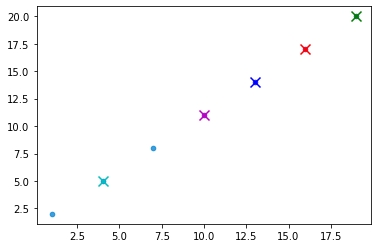

In [6]:
points = np.array([[1,2,3,4],[4,5,6,7],[7,8,9,10],[10,11,12,13],[13,14,15,16],[16,17,18,19],[19,20,21,22]])
# centroids = np.array([[1,1],[2,2],[3,3],[4,4],[5,5]])
m , n = points.shape
print(points.shape)
# k = centroids.shape[0]
GUC_Kmean(points,5,"euclidean")
display_cluster(points)
(clusters_heads ,  dic) = GUC_Kmean(points,5, 'euclidean')
display_cluster(points ,km = dic,  num_clusters=5)

In [7]:
# Data_points = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[16,17,18]])
# centroids = np.array([[1,1,1],[2,2,2],[3,3,3],[4,4,4]])
# k = 4
# m , n = Data_points.shape
# cluster_heads=Data_points[np.random.choice([i for i in range(Data_points.shape[0])], k, replace=False)]
# centroids = cluster_heads
# Flag = True
# while Flag == True:
#     d = GUC_Distance(centroids,Data_points,"euclidean")
#     idxx = np.argmin(d,axis = 1)
#     value = np.amin(d,axis = 1)
#     clusters = [[] for _ in range(k)]
#     for i, sample in enumerate(Data_points):
#         centroid_idx = idxx[i]
#         clusters[centroid_idx].append(i)
#     centroids_old = centroids
#     centroids = np.zeros((k, Data_points.shape[1]))
#     for cluster_idx, cluster in enumerate(clusters):
#         cluster_mean = np.mean(points[cluster], axis=0)
#         centroids[cluster_idx] = cluster_mean
#     cluster_heads = centroids
#     distance = [ np.sqrt(np.sum((centroids_old[i] - centroids[i]) ** 2)) for i in range(k) ]
#     if sum(distance) == 0:
#         Flag = False
#     labels = np.empty(Data_points.shape[0])
#     for cluster_idx, cluster in enumerate(clusters):
#         for sample_index in cluster:
#             labels[sample_index] = cluster_idx
#     dic = {'labels_' : labels , 'cluster_centers_' : cluster_heads}

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [8]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [9]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km["labels_"]==i,0],X[km["labels_"]==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km["cluster_centers_"][i][0],km["cluster_centers_"][i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

[[ 1.00000000e+00  0.00000000e+00]
 [ 9.51056516e-01  3.09016994e-01]
 [ 8.09016994e-01  5.87785252e-01]
 [ 5.87785252e-01  8.09016994e-01]
 [ 3.09016994e-01  9.51056516e-01]
 [ 6.12323400e-17  1.00000000e+00]
 [-3.09016994e-01  9.51056516e-01]
 [-5.87785252e-01  8.09016994e-01]
 [-8.09016994e-01  5.87785252e-01]
 [-9.51056516e-01  3.09016994e-01]
 [-1.00000000e+00  1.22464680e-16]
 [-9.51056516e-01 -3.09016994e-01]
 [-8.09016994e-01 -5.87785252e-01]
 [-5.87785252e-01 -8.09016994e-01]
 [-3.09016994e-01 -9.51056516e-01]
 [-1.83697020e-16 -1.00000000e+00]
 [ 3.09016994e-01 -9.51056516e-01]
 [ 5.87785252e-01 -8.09016994e-01]
 [ 8.09016994e-01 -5.87785252e-01]
 [ 9.51056516e-01 -3.09016994e-01]]


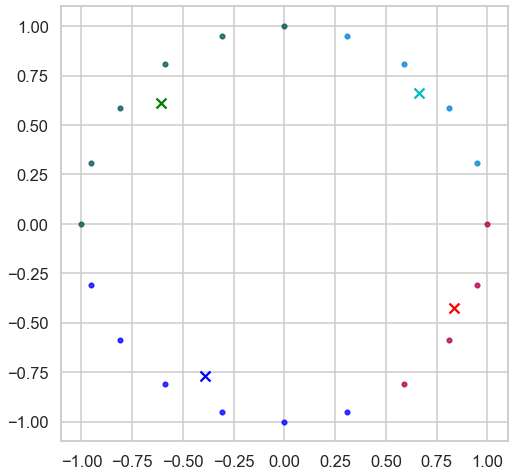

In [10]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
print(X1)
display_cluster(X1)
(clusters_heads ,  dic) = GUC_Kmean(X1,4, 'euclidean')
display_cluster(X1 ,dic,  num_clusters=4)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

[[-2.50328585 -3.1382643 ]
 [-2.35231146 -1.47697014]
 [-3.23415337 -3.23413696]
 ...
 [ 9.35144821 10.07015024]
 [ 8.97347874  8.11812535]
 [ 8.83693304  8.25509736]]


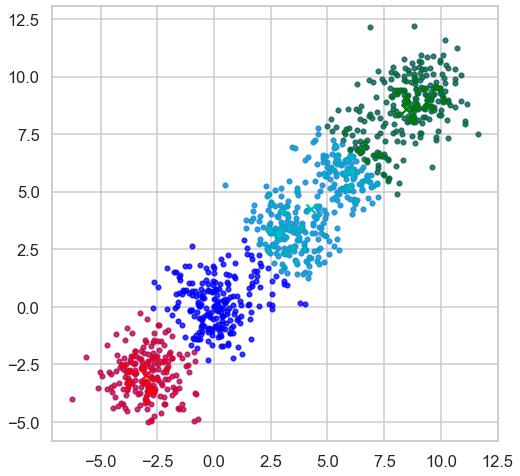

In [11]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y2 = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
print(X2)
display_cluster(X2)
(clusters_heads ,  dic) = GUC_Kmean(X2,4, 'euclidean')
display_cluster(X2 ,dic,  num_clusters=4)

#### 2.3. Example 3 : moons Data Gen and display 

[[ 5.52295863e-01  5.74409873e-01]
 [ 1.87729833e+00  5.17584370e-01]
 [-2.15676193e-04  6.19247949e-02]
 ...
 [-9.84392549e-01  2.33551574e-01]
 [ 1.86245802e-02  2.25842524e-01]
 [ 1.64939159e+00 -1.13144560e-01]]


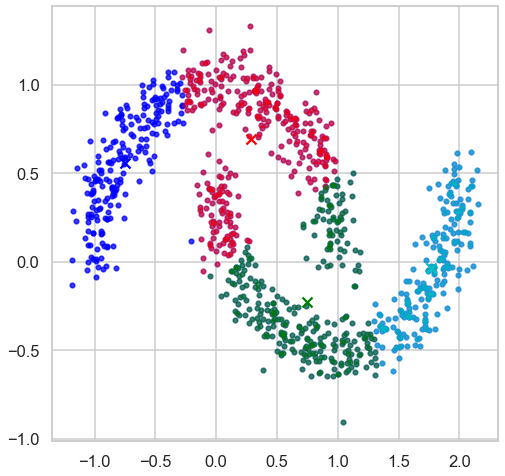

In [12]:
n_samples = 1000
X3, y3 = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
print(X3)
display_cluster(X3)
(clusters_heads ,  dic) = GUC_Kmean(X3,4, 'euclidean')
display_cluster(X3 ,dic,  num_clusters=4)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

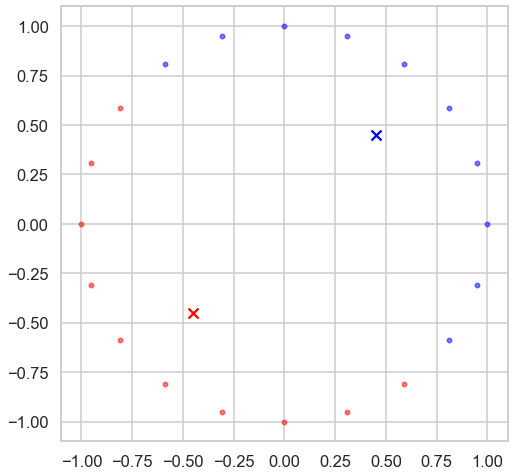

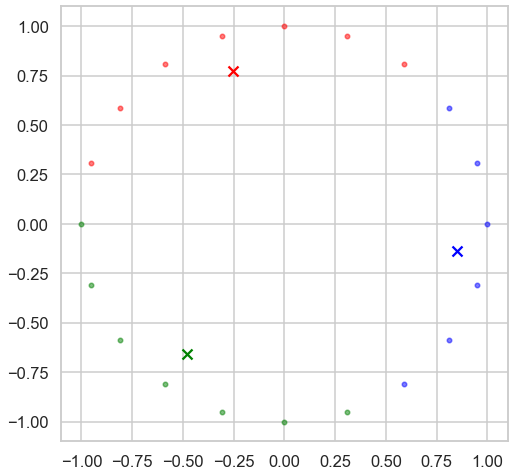

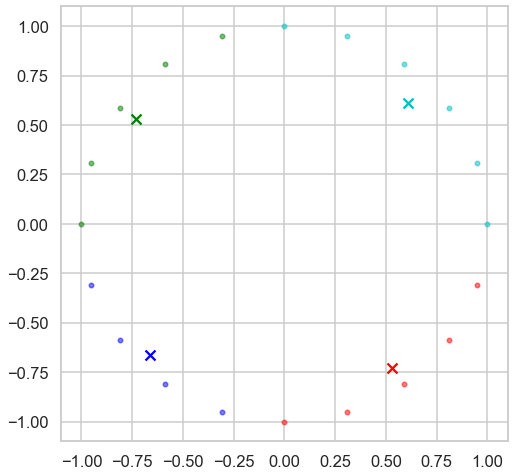

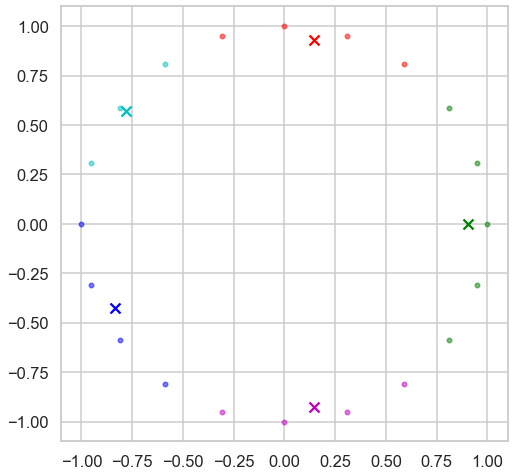

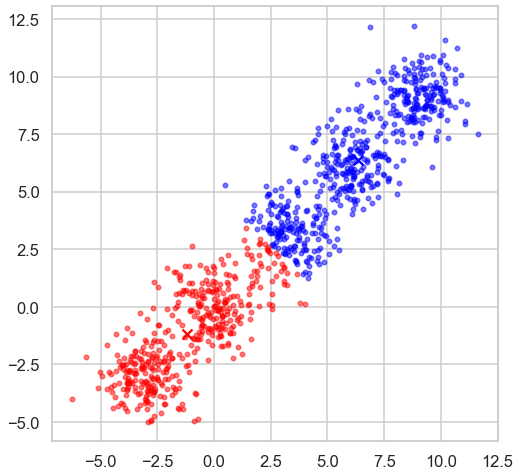

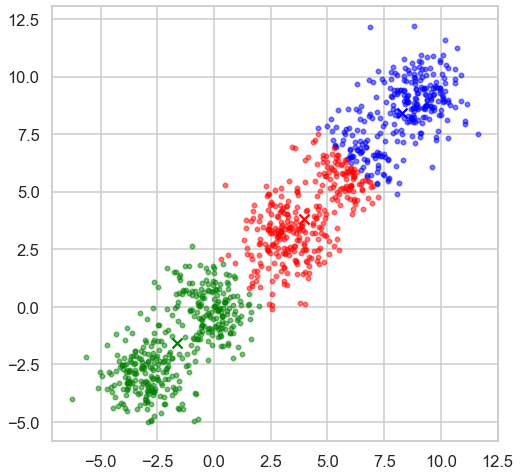

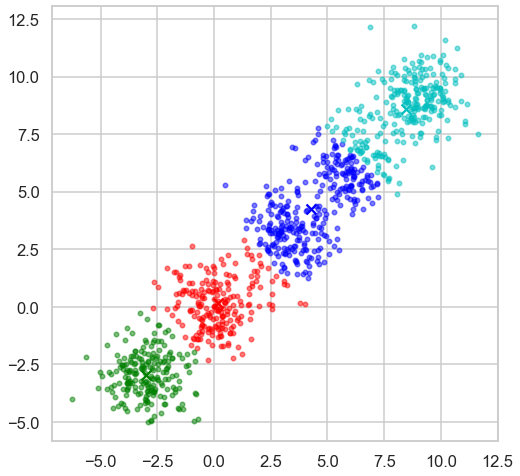

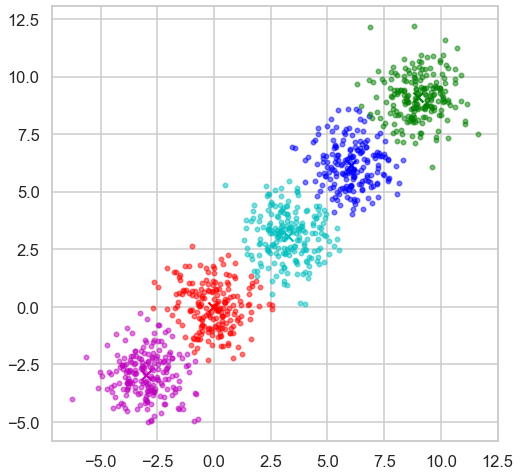

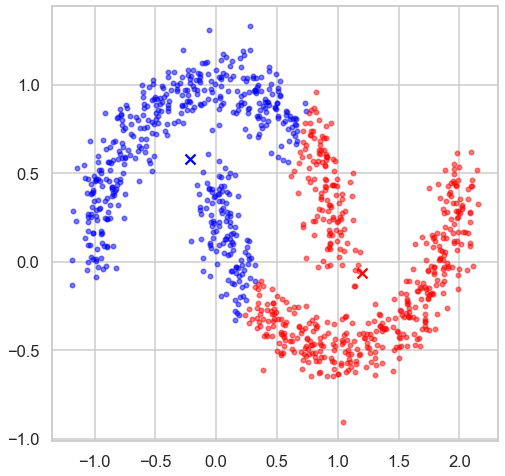

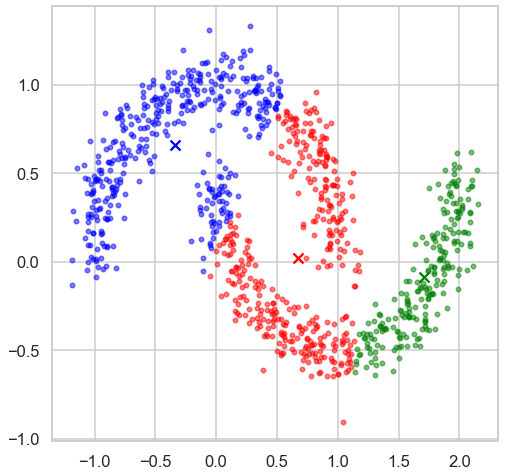

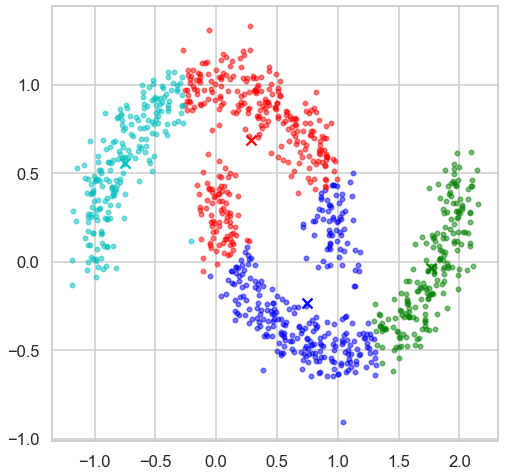

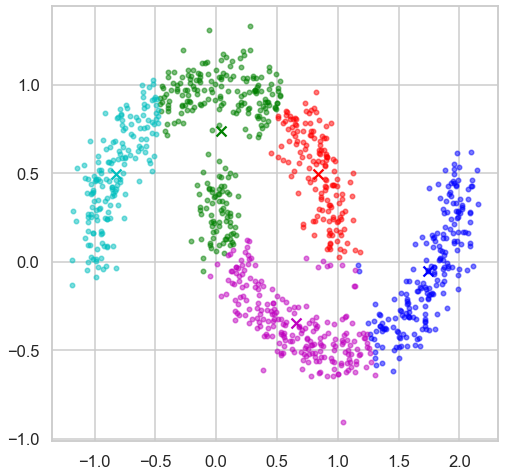

In [13]:
for i,X in enumerate([X1, X2, X3]):
    for n, j in enumerate(range(2,6)):
        (Clusters_heads , dic) = GUC_Kmean(X,j, 'euclidean')
        plt.figure()
        display_cluster(X ,dic,  num_clusters=j)

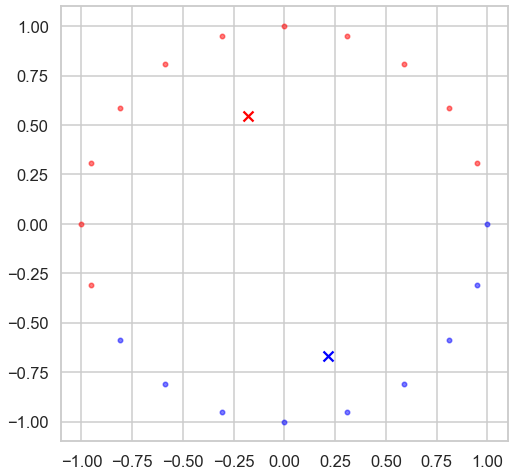

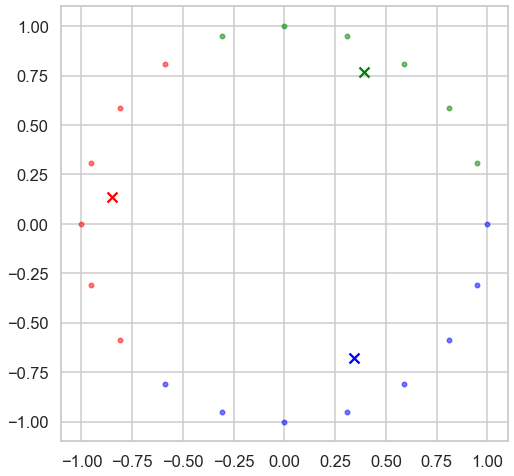

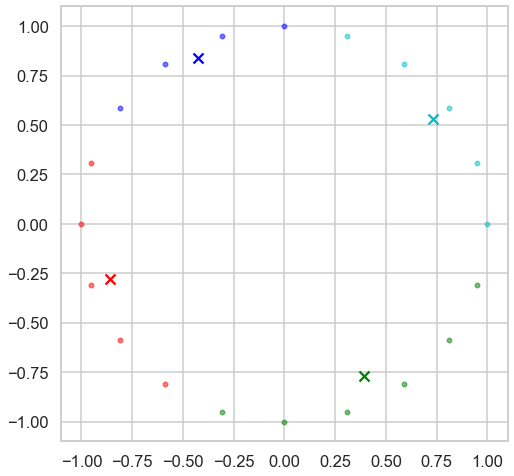

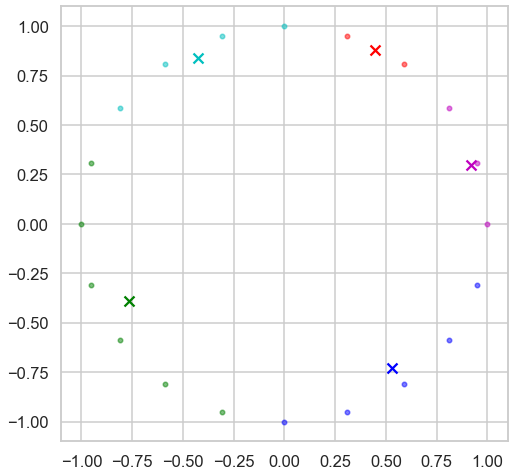

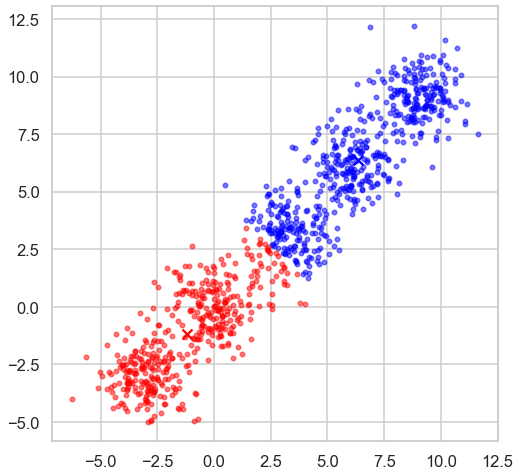

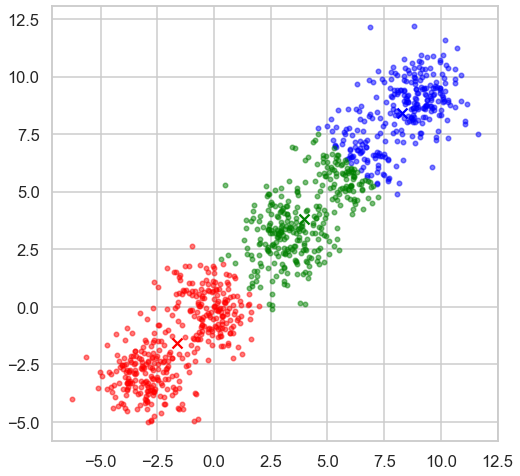

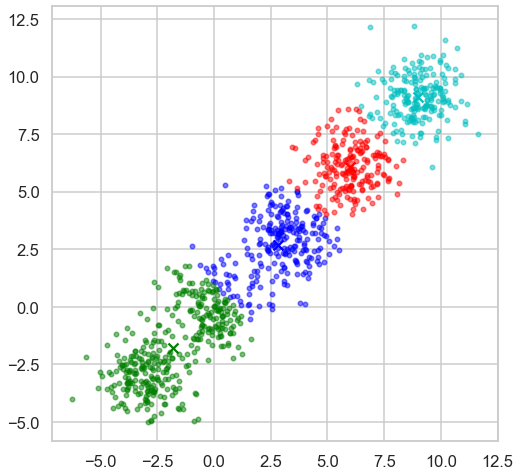

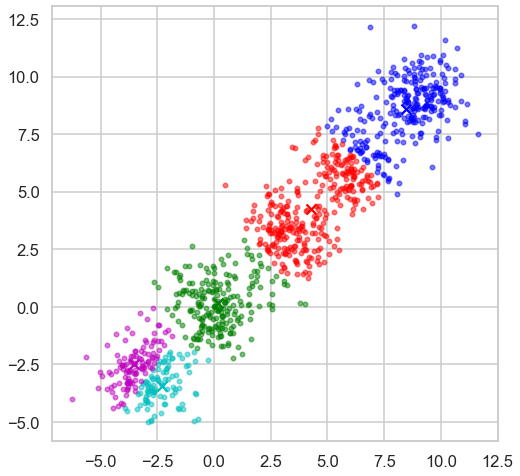

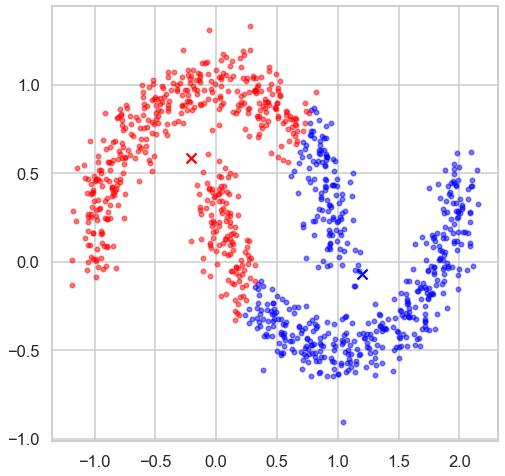

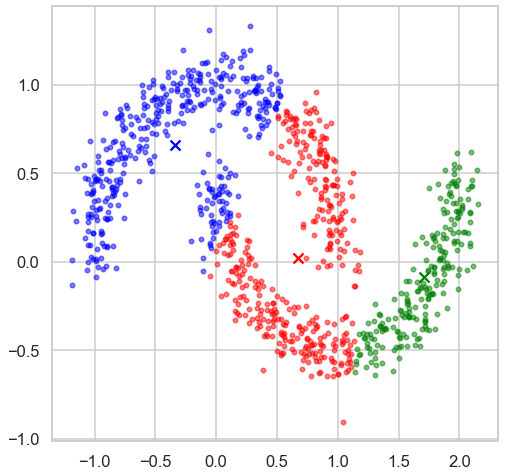

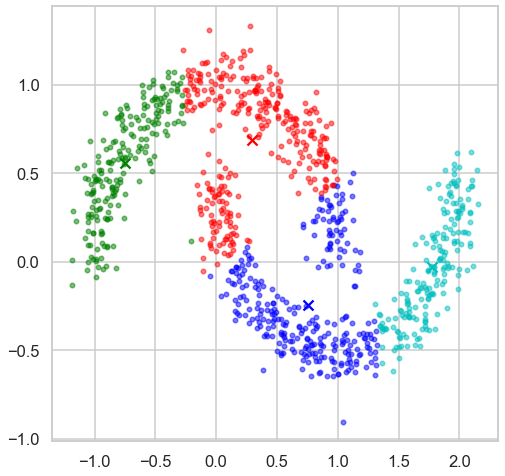

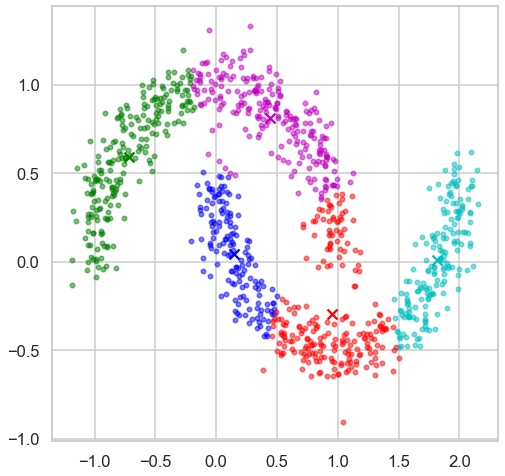

In [14]:
for i,X in enumerate([X1, X2, X3]):
    for n, j in enumerate(range(2,6)):
        (Clusters_heads , dic) = GUC_Kmean(X,j, 'pearson')
        plt.figure()
        display_cluster(X ,dic,  num_clusters=j)

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

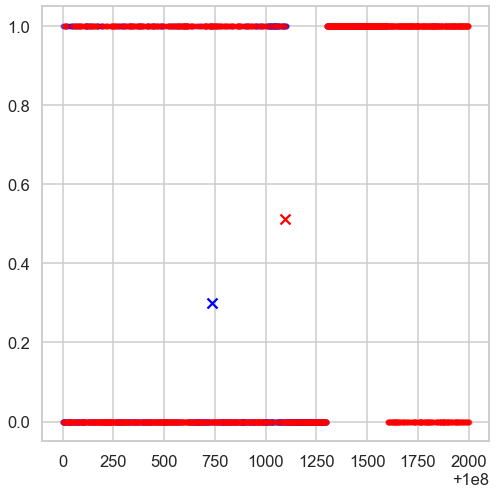

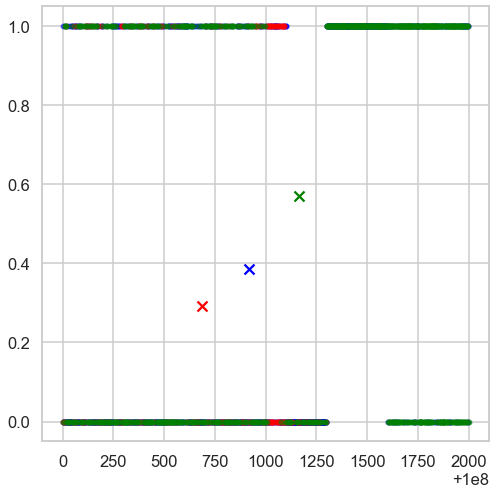

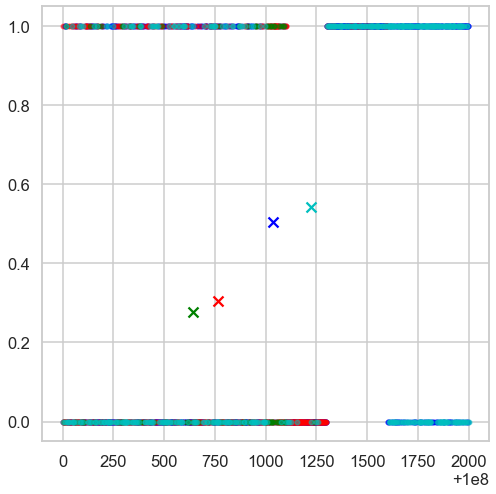

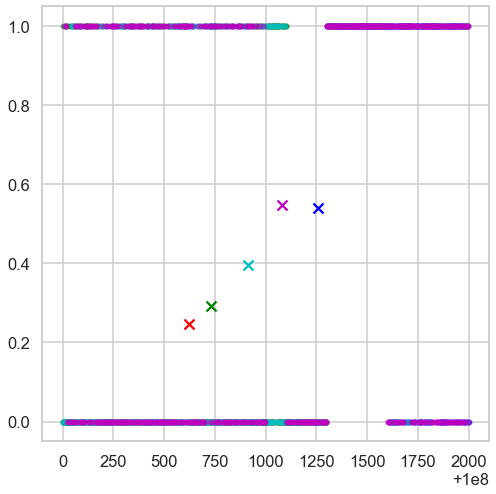

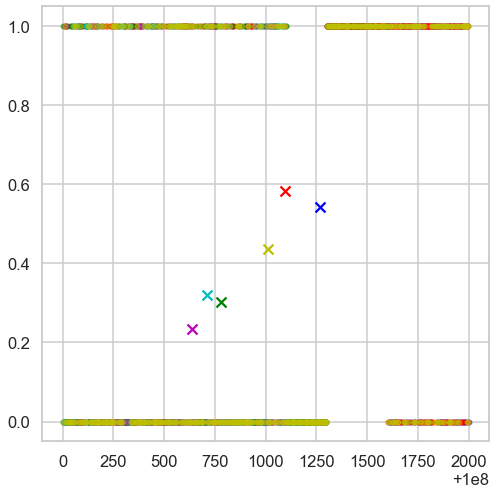

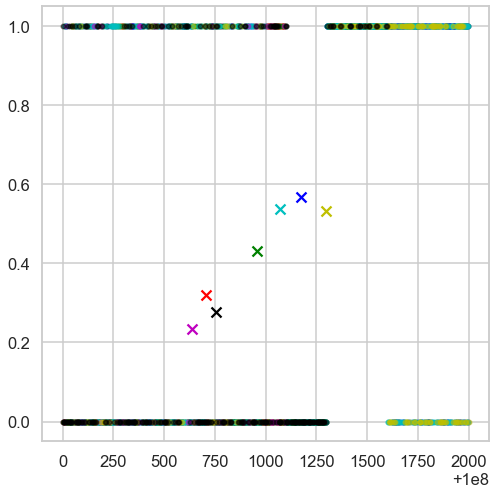

In [15]:
X4 = pd.read_csv('Customer data.csv')
X4 = np.array(X4)
for n, j in enumerate(range(2,8)):
    (Clusters_heads , dic) = GUC_Kmean(X4,j, 'euclidean')
    plt.figure()
    display_cluster(X4 ,km = dic,  num_clusters=j)

In [51]:
def distortions_calc(Data_points,Number_of_clusters):
    distortions = []
    mapping = {}
    for n, k in enumerate(range(1,Number_of_clusters)):
        (Clusters_heads , dic) = GUC_Kmean(Data_points,k, 'euclidean')
        distortions.append(sum(np.min(cdist(Data_points, dic['cluster_centers_'],
                                        'euclidean'), axis=1)) / Data_points.shape[0])
        mapping[k] = sum(np.min(cdist(Data_points, dic['cluster_centers_'],
                                        'euclidean'), axis=1)) / Data_points.shape[0]
    return distortions , mapping 

In [59]:
distortions , mapping = distortions_calc(Data_points=X1,Number_of_clusters = 10)
distortions

[1.0,
 0.7241739356110178,
 0.5097707103960228,
 0.3911732938865269,
 0.34379542168175053,
 0.27099852410178504,
 0.24995013509819303,
 0.22049730101683984,
 0.20896950505891]

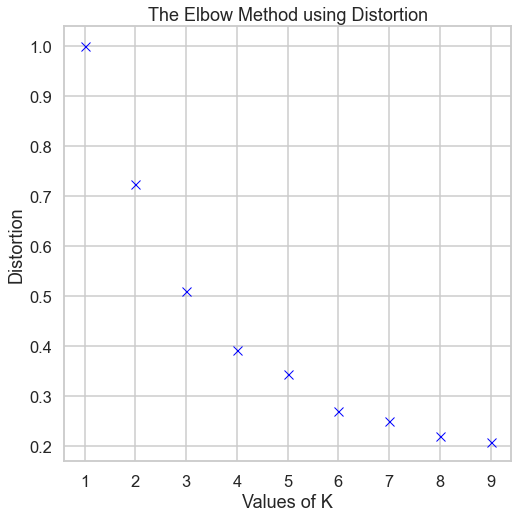

In [60]:
for key, val in mapping.items():
    plt.plot(key, val, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method using Distortion')
plt.show()